In [1]:
from vivarium import Artifact
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from db_queries import get_ids, get_outputs

In [2]:
india = pd.read_hdf('/share/costeffectiveness/results/vivarium_gates_bep/base_model/india/2020_02_03_20_15_54/output.hdf')

In [3]:
india.head()

total_population_untracked  \
input_draw_number random_seed                               
829.0             5.0                                 0.0   
650.0             7.0                                 0.0   
629.0             44.0                                0.0   
946.0             5.0                                 0.0   
                  12.0                                0.0   

                               total_population_tracked  total_population  \
input_draw_number random_seed                                               
829.0             5.0                           10000.0           10000.0   
650.0             7.0                           10000.0           10000.0   
629.0             44.0                          10000.0           10000.0   
946.0             5.0                           10000.0           10000.0   
                  12.0                          10000.0           10000.0   

                               diarrheal_diseases_prevalent_cases_at_sim_end  \
input_draw_number random_seed                                                  
829.0             5.0                                                  108.0   
650.0             7.0                                                  123.0   
629.0             44.0                                                  93.0   
946.0             5.0                                                  109.0   
                  12.0                                                 115.0   

                               susceptible_to_diarrheal_diseases_event_count  \
input_draw_number random_seed                                                  
829.0             5.0                                                17669.0   
650.0             7.0                                                20216.0   
629.0             44.0                                               16324.0   
946.0             5.0                                                19220.0   
                  12.0                                               19502.0   

                               diarrheal_diseases_event_count  \
input_draw_number random_seed                                   
829.0             5.0                                 17706.0   
650.0             7.0                                 20290.0   
629.0             44.0                                16355.0   
946.0             5.0                                 19271.0   
                  12.0                                19556.0   

                               measles_prevalent_cases_at_sim_end  \
input_draw_number random_seed                                       
829.0             5.0                                      1964.0   
650.0             7.0                                       787.0   
629.0             44.0                                     1958.0   
946.0             5.0                                       753.0   
                  12.0                                      791.0   

                               susceptible_to_measles_event_count  \
input_draw_number random_seed                                       
829.0             5.0                                         0.0   
650.0             7.0                                         0.0   
629.0             44.0                                        0.0   
946.0             5.0                                         0.0   
                  12.0                                        0.0   

                               measles_event_count  \
input_draw_number random_seed                        
829.0             5.0                       1979.0   
650.0             7.0                        797.0   
629.0             44.0                      1986.0   
946.0             5.0                        763.0   
                  12.0                       801.0   

                               recovered_from_measles_event_count  ...  \
input_draw_number random_seed                                   

In [48]:
[i for i in india.columns if 'test' in i]

[]

In [180]:
# sum across input draw
copy = india.groupby('input_draw').sum()

# calculate CSMRs
copy['male_csmr_dd_early'] = copy['death_due_to_diarrheal_diseases_in_2020_among_male_in_age_group_early_neonatal']/copy['person_time_in_2020_among_male_in_age_group_early_neonatal']
copy['male_csmr_nn_early'] = copy['death_due_to_neonatal_disorders_in_2020_among_male_in_age_group_early_neonatal']/copy['person_time_in_2020_among_male_in_age_group_early_neonatal']
copy['male_csmr_measles_early'] = copy['death_due_to_measles_in_2020_among_male_in_age_group_early_neonatal']/copy['person_time_in_2020_among_male_in_age_group_early_neonatal']
copy['male_csmr_meningitis_early'] = copy['death_due_to_meningitis_in_2020_among_male_in_age_group_early_neonatal']/copy['person_time_in_2020_among_male_in_age_group_early_neonatal']
copy['male_csmr_lri_early'] = copy['death_due_to_lower_respiratory_infections_in_2020_among_male_in_age_group_early_neonatal']/copy['person_time_in_2020_among_male_in_age_group_early_neonatal']
copy['male_csmr_pem_early'] = copy['death_due_to_protein_energy_malnutrition_in_2020_among_male_in_age_group_early_neonatal']/copy['person_time_in_2020_among_male_in_age_group_early_neonatal']
copy['male_csmr_dd_late'] = copy['death_due_to_diarrheal_diseases_in_2020_among_male_in_age_group_late_neonatal']/copy['person_time_in_2020_among_male_in_age_group_late_neonatal']
copy['male_csmr_nn_late'] = copy['death_due_to_neonatal_disorders_in_2020_among_male_in_age_group_late_neonatal']/copy['person_time_in_2020_among_male_in_age_group_late_neonatal']
copy['male_csmr_measles_late'] = copy['death_due_to_measles_in_2020_among_male_in_age_group_late_neonatal']/copy['person_time_in_2020_among_male_in_age_group_late_neonatal']
copy['male_csmr_meningitis_late'] = copy['death_due_to_meningitis_in_2020_among_male_in_age_group_late_neonatal']/copy['person_time_in_2020_among_male_in_age_group_late_neonatal']
copy['male_csmr_lri_late'] = copy['death_due_to_lower_respiratory_infections_in_2020_among_male_in_age_group_late_neonatal']/copy['person_time_in_2020_among_male_in_age_group_late_neonatal']
copy['male_csmr_pem_late'] = copy['death_due_to_protein_energy_malnutrition_in_2020_among_male_in_age_group_late_neonatal']/copy['person_time_in_2020_among_male_in_age_group_late_neonatal']
copy['female_csmr_dd_early'] = copy['death_due_to_diarrheal_diseases_in_2020_among_female_in_age_group_early_neonatal']/copy['person_time_in_2020_among_female_in_age_group_early_neonatal']
copy['female_csmr_nn_early'] = copy['death_due_to_neonatal_disorders_in_2020_among_female_in_age_group_early_neonatal']/copy['person_time_in_2020_among_female_in_age_group_early_neonatal']
copy['female_csmr_measles_early'] = copy['death_due_to_measles_in_2020_among_female_in_age_group_early_neonatal']/copy['person_time_in_2020_among_female_in_age_group_early_neonatal']
copy['female_csmr_meningitis_early'] = copy['death_due_to_meningitis_in_2020_among_female_in_age_group_early_neonatal']/copy['person_time_in_2020_among_female_in_age_group_early_neonatal']
copy['female_csmr_lri_early'] = copy['death_due_to_lower_respiratory_infections_in_2020_among_female_in_age_group_early_neonatal']/copy['person_time_in_2020_among_female_in_age_group_early_neonatal']
copy['female_csmr_pem_early'] = copy['death_due_to_protein_energy_malnutrition_in_2020_among_female_in_age_group_early_neonatal']/copy['person_time_in_2020_among_female_in_age_group_early_neonatal']
copy['female_csmr_dd_late'] = copy['death_due_to_diarrheal_diseases_in_2020_among_female_in_age_group_late_neonatal']/copy['person_time_in_2020_among_female_in_age_group_late_neonatal']
copy['female_csmr_nn_late'] = copy['death_due_to_neonatal_disorders_in_2020_among_female_in_age_group_late_neonatal']/copy['person_time_in_2020_among_female_in_age_group_late_neonatal']
copy['female_csmr_measles_late'] = copy['death_due_to_measles_in_2020_among_female_in_age_group_late_neonatal']/copy['person_time_in_2020_among_female_in_age_group_late_neonatal']
copy['female_csmr_meningitis_late'] = copy['death_due_to_meningitis_in_2020_among_female_in_age_group_late_neonatal']/copy['person_time_in_2020_among_female_in_age_group_late_neonatal']
copy['female_csmr_lri_late'] = copy['death_due_to_lower_respiratory_infections_in_2020_among_female_in_age_group_late_neonatal']/copy['person_time_in_2020_among_female_in_age_group_late_neonatal']
copy['female_csmr_pem_late'] = copy['death_due_to_protein_energy_malnutrition_in_2020_among_female_in_age_group_late_neonatal']/copy['person_time_in_2020_among_female_in_age_group_late_neonatal']

# reset index for compatibility
copy = copy.drop(columns=['random_seed'])
copy = copy.reset_index()

# keep relevant columns only
copy_prepped = copy[['male_csmr_dd_early','male_csmr_lri_early','male_csmr_meningitis_early',
                  'male_csmr_measles_early','male_csmr_nn_early','male_csmr_pem_early',
                  'male_csmr_dd_late','male_csmr_lri_late','male_csmr_meningitis_late',
                  'male_csmr_measles_late','male_csmr_nn_late','male_csmr_pem_late',
                  'female_csmr_dd_early','female_csmr_lri_early','female_csmr_meningitis_early',
                  'female_csmr_measles_early','female_csmr_nn_early','female_csmr_pem_early',
                  'female_csmr_dd_late','female_csmr_lri_late','female_csmr_meningitis_late',
                  'female_csmr_measles_late','female_csmr_nn_late','female_csmr_pem_late']]

# create results dataframe
results = pd.DataFrame()

# average over input draws (and take 95% CIs)
results['mean'] = copy_prepped.mean()
results['lcl'] = copy_prepped.quantile(0.025)
results['ucl'] = copy_prepped.quantile(0.975)

# format for compatibility with get_outputs results
results = results.reset_index()
results = results.rename(columns={'index': 'parameter'})
results['sex_id'] = np.where(results['parameter'].str.contains('female'), 2, 1)
results['age_group_id'] = np.where(results['parameter'].str.contains('early'), 2, 3)
results['cause_id'] = np.where(results['parameter'].str.contains('dd'),302,0)
results['cause_id'] = np.where(results['parameter'].str.contains('lri'),322,results['cause_id'])
results['cause_id'] = np.where(results['parameter'].str.contains('meningitis'),332,results['cause_id'])
results['cause_id'] = np.where(results['parameter'].str.contains('measles'),341,results['cause_id'])
results['cause_id'] = np.where(results['parameter'].str.contains('nn'),380,results['cause_id'])
results['cause_id'] = np.where(results['parameter'].str.contains('pem'),387,results['cause_id'])
results

,parameter,mean,lcl,ucl,sex_id,age_group_id,cause_id
0,male_csmr_dd_early,0.029328,0.019957,0.035919,1,2,302
1,male_csmr_lri_early,0.068396,0.052091,0.080287,1,2,322
2,male_csmr_meningitis_early,0.001808,0.000000,0.003019,1,2,332
3,male_csmr_measles_early,0.000000,0.000000,0.000000,1,2,341
4,male_csmr_nn_early,0.505380,0.435924,0.565132,1,2,380
5,male_csmr_pem_early,0.000000,0.000000,0.000000,1,2,387
6,male_csmr_dd_late,0.006716,0.005207,0.007979,1,3,302
7,male_csmr_lri_late,0.008063,0.005543,0.011396,1,3,322
8,male_csmr_meningitis_late,0.000337,0.000000,0.000939,1,3,332
9,male_csmr_measles_late,0.000000,0.000000,0.000000,1,3,341


In [181]:
# get relevant results from get_outputs 
    #(note; exclude PEM and measels here because they are null for these age groups)
nn_deaths = get_outputs(gbd_round_id=5, year_id=2017, sex_id=[1,2],
                topic='cause', cause_id=[380,302,332,322], location_id=163,
                measure_id=1, metric_id=3, age_group_id=[2,3])
nn_deaths

,age_group_id,cause_id,location_id,measure_id,metric_id,sex_id,year_id,acause,age_group_name,cause_name,expected,location_name,measure_name,metric_name,sex,val,upper,lower
0,2,302,163,1,3,1,2017,diarrhea,Early Neonatal,Diarrheal diseases,False,India,Deaths,Rate,Male,0.013025,0.017997,0.009209
1,2,322,163,1,3,1,2017,lri,Early Neonatal,Lower respiratory infections,False,India,Deaths,Rate,Male,0.080927,0.097786,0.067617
2,2,332,163,1,3,1,2017,meningitis,Early Neonatal,Meningitis,False,India,Deaths,Rate,Male,0.001972,0.002716,0.001120
3,2,380,163,1,3,1,2017,neonatal,Early Neonatal,Neonatal disorders,False,India,Deaths,Rate,Male,0.806794,0.864446,0.750801
4,2,302,163,1,3,2,2017,diarrhea,Early Neonatal,Diarrheal diseases,False,India,Deaths,Rate,Female,0.014653,0.019801,0.010690
5,2,322,163,1,3,2,2017,lri,Early Neonatal,Lower respiratory infections,False,India,Deaths,Rate,Female,0.073380,0.091664,0.059824
6,2,332,163,1,3,2,2017,meningitis,Early Neonatal,Meningitis,False,India,Deaths,Rate,Female,0.001419,0.001937,0.000740
7,2,380,163,1,3,2,2017,neonatal,Early Neonatal,Neonatal disorders,False,India,Deaths,Rate,Female,0.707898,0.768499,0.651899
8,3,302,163,1,3,1,2017,diarrhea,Late Neonatal,Diarrheal diseases,False,India,Deaths,Rate,Male,0.005400,0.007591,0.003730
9,3,322,163,1,3,1,2017,lri,Late Neonatal,Lower respiratory infections,False,India,Deaths,Rate,Male,0.016868,0.019084,0.014340


In [174]:
# merge model CSMRs and GBD CSMRs
merged = nn_deaths.merge(results, right_on=['age_group_id','cause_id','sex_id'],
                        left_on=['age_group_id','cause_id','sex_id'])
merged 

,age_group_id,cause_id,location_id,measure_id,metric_id,sex_id,year_id,acause,age_group_name,cause_name,...,measure_name,metric_name,sex,val,upper,lower,parameter,mean,lcl,ucl
0,2,302,163,1,3,1,2017,diarrhea,Early Neonatal,Diarrheal diseases,...,Deaths,Rate,Male,0.013025,0.017997,0.009209,male_csmr_dd_early,0.029328,0.019957,0.035919
1,2,322,163,1,3,1,2017,lri,Early Neonatal,Lower respiratory infections,...,Deaths,Rate,Male,0.080927,0.097786,0.067617,male_csmr_lri_early,0.068396,0.052091,0.080287
2,2,332,163,1,3,1,2017,meningitis,Early Neonatal,Meningitis,...,Deaths,Rate,Male,0.001972,0.002716,0.001120,male_csmr_meningitis_early,0.001808,0.000000,0.003019
3,2,380,163,1,3,1,2017,neonatal,Early Neonatal,Neonatal disorders,...,Deaths,Rate,Male,0.806794,0.864446,0.750801,male_csmr_nn_early,0.505380,0.435924,0.565132
4,2,302,163,1,3,2,2017,diarrhea,Early Neonatal,Diarrheal diseases,...,Deaths,Rate,Female,0.014653,0.019801,0.010690,female_csmr_dd_early,0.027516,0.019769,0.037324
5,2,322,163,1,3,2,2017,lri,Early Neonatal,Lower respiratory infections,...,Deaths,Rate,Female,0.073380,0.091664,0.059824,female_csmr_lri_early,0.052699,0.038377,0.063412
6,2,332,163,1,3,2,2017,meningitis,Early Neonatal,Meningitis,...,Deaths,Rate,Female,0.001419,0.001937,0.000740,female_csmr_meningitis_early,0.001982,0.000000,0.005012
7,2,380,163,1,3,2,2017,neonatal,Early Neonatal,Neonatal disorders,...,Deaths,Rate,Female,0.707898,0.768499,0.651899,female_csmr_nn_early,0.411432,0.350262,0.487678
8,3,302,163,1,3,1,2017,diarrhea,Late Neonatal,Diarrheal diseases,...,Deaths,Rate,Male,0.005400,0.007591,0.003730,male_csmr_dd_late,0.006716,0.005207,0.007979
9,3,322,163,1,3,1,2017,lri,Late Neonatal,Lower respiratory infections,...,Deaths,Rate,Male,0.016868,0.019084,0.014340,male_csmr_lri_late,0.008063,0.005543,0.011396


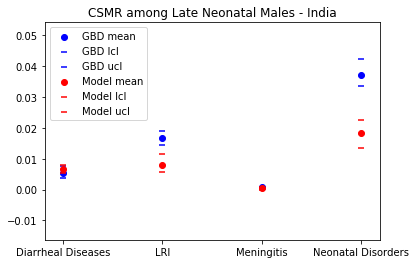

In [182]:
# plot by cause - late neonatal males

plt.scatter(['Diarrheal Diseases','LRI','Meningitis','Neonatal Disorders'],
        merged['val'].where(merged['sex_id'] == 1).where(merged['age_group_id'] == 3).dropna(),
           c='b')
plt.scatter(['Diarrheal Diseases','LRI','Meningitis','Neonatal Disorders'],
        merged['upper'].where(merged['sex_id'] == 1).where(merged['age_group_id'] == 3).dropna(),
           marker='_',c='b')
plt.scatter(['Diarrheal Diseases','LRI','Meningitis','Neonatal Disorders'],
        merged['lower'].where(merged['sex_id'] == 1).where(merged['age_group_id'] == 3).dropna(),
           marker='_',c='b')

plt.scatter(['Diarrheal Diseases','LRI','Meningitis','Neonatal Disorders'],
        merged['mean'].where(merged['sex_id'] == 1).where(merged['age_group_id'] == 3).dropna(),
           c='r')
plt.scatter(['Diarrheal Diseases','LRI','Meningitis','Neonatal Disorders'],
        merged['lcl'].where(merged['sex_id'] == 1).where(merged['age_group_id'] == 3).dropna(),
           marker='_',c='r')
plt.scatter(['Diarrheal Diseases','LRI','Meningitis','Neonatal Disorders'],
        merged['ucl'].where(merged['sex_id'] == 1).where(merged['age_group_id'] == 3).dropna(),
           marker='_',c='r')

plt.title('CSMR among Late Neonatal Males - India')
plt.legend(['GBD mean','GBD lcl','GBD ucl',
           'Model mean','Model lcl','Model ucl'])
#plt.ylim(0,0.2)

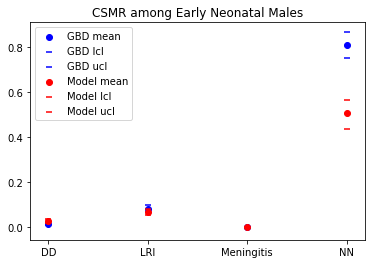

In [183]:
# plot by cause - early neonatal males

plt.scatter(['DD','LRI','Meningitis','NN'],
        merged['val'].where(merged['sex_id'] == 1).where(merged['age_group_id'] == 2).dropna(),
           c='b')
plt.scatter(['DD','LRI','Meningitis','NN'],
        merged['upper'].where(merged['sex_id'] == 1).where(merged['age_group_id'] == 2).dropna(),
           marker='_',c='b')
plt.scatter(['DD','LRI','Meningitis','NN'],
        merged['lower'].where(merged['sex_id'] == 1).where(merged['age_group_id'] == 2).dropna(),
           marker='_',c='b')

plt.scatter(['DD','LRI','Meningitis','NN'],
        merged['mean'].where(merged['sex_id'] == 1).where(merged['age_group_id'] == 2).dropna(),
           c='r')
plt.scatter(['DD','LRI','Meningitis','NN'],
        merged['lcl'].where(merged['sex_id'] == 1).where(merged['age_group_id'] == 2).dropna(),
           marker='_',c='r')
plt.scatter(['DD','LRI','Meningitis','NN'],
        merged['ucl'].where(merged['sex_id'] == 1).where(merged['age_group_id'] == 2).dropna(),
           marker='_',c='r')

plt.title('CSMR among Early Neonatal Males')
plt.legend(['GBD mean','GBD lcl','GBD ucl',
           'Model mean','Model lcl','Model ucl'])

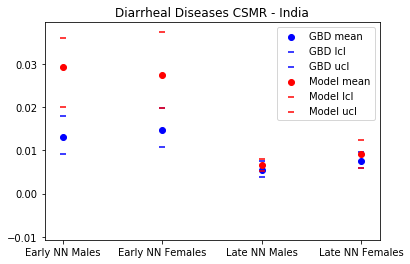

In [189]:
# plot by age/sex group - diarrheal diseases
plt.scatter(['Early NN Males','Early NN Females','Late NN Males','Late NN Females'],
        merged['val'].where(merged['cause_id'] == 302).dropna(),
           c='b')
plt.scatter(['Early NN Males','Early NN Females','Late NN Males','Late NN Females'],
        merged['lower'].where(merged['cause_id'] == 302).dropna(),
           c='b',marker='_')
plt.scatter(['Early NN Males','Early NN Females','Late NN Males','Late NN Females'],
        merged['upper'].where(merged['cause_id'] == 302).dropna(),
           c='b',marker='_')

plt.scatter(['Early NN Males','Early NN Females','Late NN Males','Late NN Females'],
        merged['mean'].where(merged['cause_id'] == 302).dropna(),
           c='r')
plt.scatter(['Early NN Males','Early NN Females','Late NN Males','Late NN Females'],
        merged['lcl'].where(merged['cause_id'] == 302).dropna(),
           c='r',marker='_')
plt.scatter(['Early NN Males','Early NN Females','Late NN Males','Late NN Females'],
        merged['ucl'].where(merged['cause_id'] == 302).dropna(),
           c='r',marker='_')

plt.title('Diarrheal Diseases CSMR - India')
plt.legend(['GBD mean','GBD lcl','GBD ucl',
           'Model mean','Model lcl','Model ucl'])
#plt.ylim(0,0.02)

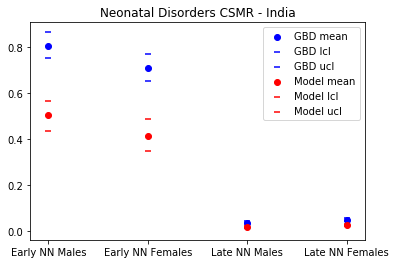

In [190]:
# plot by age/sex group - Neonatal disorders
plt.scatter(['Early NN Males','Early NN Females','Late NN Males','Late NN Females'],
        merged['val'].where(merged['cause_id'] == 380).dropna(),
           c='b')
plt.scatter(['Early NN Males','Early NN Females','Late NN Males','Late NN Females'],
        merged['lower'].where(merged['cause_id'] == 380).dropna(),
           c='b',marker='_')
plt.scatter(['Early NN Males','Early NN Females','Late NN Males','Late NN Females'],
        merged['upper'].where(merged['cause_id'] == 380).dropna(),
           c='b',marker='_')

plt.scatter(['Early NN Males','Early NN Females','Late NN Males','Late NN Females'],
        merged['mean'].where(merged['cause_id'] == 380).dropna(),
           c='r')
plt.scatter(['Early NN Males','Early NN Females','Late NN Males','Late NN Females'],
        merged['lcl'].where(merged['cause_id'] == 380).dropna(),
           c='r',marker='_')
plt.scatter(['Early NN Males','Early NN Females','Late NN Males','Late NN Females'],
        merged['ucl'].where(merged['cause_id'] == 380).dropna(),
           c='r',marker='_')

plt.title('Neonatal Disorders CSMR - India')
plt.legend(['GBD mean','GBD lcl','GBD ucl',
           'Model mean','Model lcl','Model ucl'])
#plt.ylim(0,0.1)